Name: Harshith Akkapelli

Task-2: Clustering

Dataset Link: [Customer Clustering](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.0 MB/s eta 0

In [ ]:
"""Mount Google Drive to access your data"""
from google.colab import drive #Import library
drive.mount('/content/drive') #Mount it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""IMPORT DATA AND HANDLE MISSING VALUES"""
import pandas as pd #Import Library

"""Function to load and remove na valued rows"""
def importData(url):
  print("Started Reading Data")
  getData = pd.read_csv(url)
  print("Completed Reading Data")
  print(getData.head())
  print("Removing na values")
  getData = getData.dropna()
  print("Removed rows with na values")
  return getData

url = '/content/drive/MyDrive/2.csv'
inputData = importData(url) #Call the Function

Started Reading Data
Completed Reading Data
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
Removing na values
Removed rows with na values


In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *
"""Function to set up the environment"""
def doSetUpOfPycaret(inputData):
  print("Setting up the environment")
  s = setup(inputData,normalize = True,normalize_method="zscore") #Normalization of data is important
  print("Environment is set up")
  return s

s = doSetUpOfPycaret(inputData)#Call the Function

Setting up the environment


,Description,Value
0,Session id,165
1,Original data shape,"(2000, 8)"
2,Transformed data shape,"(2000, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


Environment is set up


Starting Training of models


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2347,543.6344,1.4781,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Completed Training of models
Plotting cluster plot


Plotted cluster plot
Plotting elbow plot


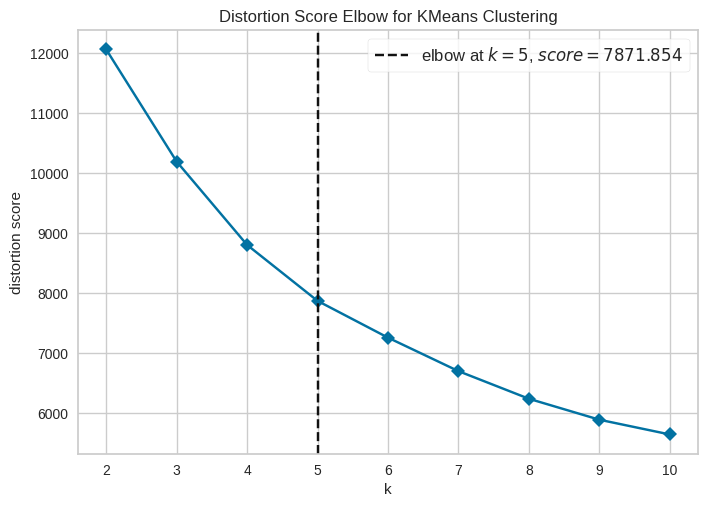

Plotted elbow plot


In [ ]:
"""Function to Train and Evaluate the models"""
def trainAndBenchmarkModels():
  #Training Phase
  print("Starting Training of models")
  finalModel = create_model('kmeans')
  print("Completed Training of models")

  #Cluster Plot
  print("Plotting cluster plot")
  plotType = 'cluster'
  plot_model(finalModel, plot = plotType)
  print("Plotted cluster plot")

  #Elbow Plot
  print("Plotting elbow plot")
  plot_model(finalModel, plot = 'elbow')
  print("Plotted elbow plot")

  #Return model
  return finalModel
finalModel = trainAndBenchmarkModels()

In [ ]:
"""Function to test the model"""
def testModel(finalModel):
  test = predict_model(finalModel,data=inputData)
  print(test.head())
testModel(finalModel)#Call the function

         ID       Sex  Marital status       Age  Education    Income  \
0 -1.731185 -0.917399       -0.993024  2.653614   1.604323  0.097524   
1 -1.729453  1.090038        1.007025 -1.187132  -0.063372  0.782654   
2 -1.727721 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   
3 -1.725989 -0.917399       -0.993024  0.775916  -0.063372  1.328386   
4 -1.724257 -0.917399       -0.993024  1.458716  -0.063372  0.736932   

   Occupation  Settlement size    Cluster  
0    0.296823         1.552326  Cluster 3  
1    0.296823         1.552326  Cluster 0  
2   -1.269525        -0.909730  Cluster 1  
3    0.296823         0.321298  Cluster 2  
4    0.296823         0.321298  Cluster 2  


Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
save_model(finalModel, 'final_pipeline') #Save the model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ID', 'Sex', 'Marital status',
                                              'Age', 'Education', 'Income',
                                              'Occupation', 'Settlement size'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=165))]),
 'final_pipeline.pkl')